In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray
from skimage import data
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist, cifar100
from tensorflow.keras.utils import to_categorical

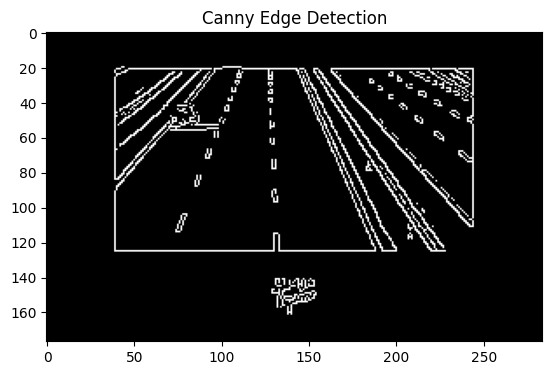

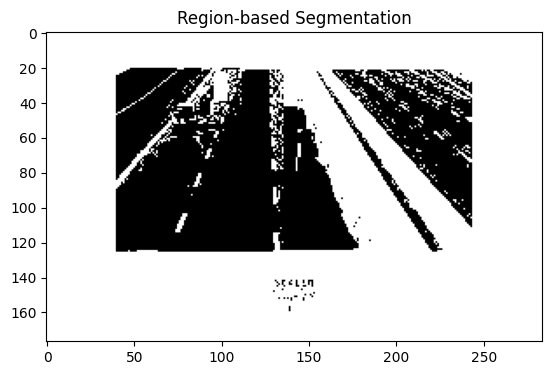

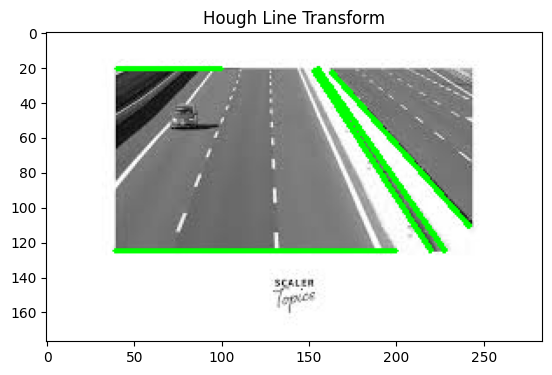

In [ ]:
# Load the image
image = cv2.imread('/content/line.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Show the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

# Apply thresholding to segment regions
_, segmented = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Show the segmented image
plt.imshow(segmented, cmap='gray')
plt.title('Region-based Segmentation')
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

# Draw the lines on the original image
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(line_image)
plt.title('Hough Line Transform')
plt.show()




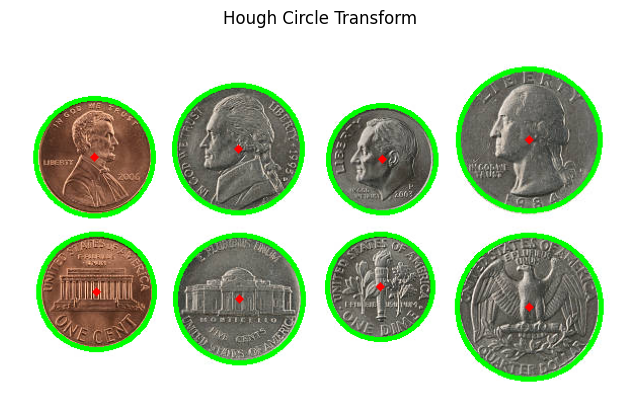

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_circles_transform(image_path):
    # Load the image
    img = cv2.imread('/content/coin.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    gray_blurred = cv2.GaussianBlur(gray, (7, 7), 1.5)

    # Apply Hough Circle Transform with further fine-tuned parameters
    circles = cv2.HoughCircles(
        gray_blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=50,   # Increased to reduce duplicate detections
        param1=100,   # Stronger edge detection threshold
        param2=50,    # Increased for stricter circle detection
        minRadius=20, # Prevents detecting very small noise
        maxRadius=80  # Avoids oversized false detections
    )

    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 3)  # Outer circle (green)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Center (red)

    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Hough Circle Transform")
    plt.axis("off")
    plt.show()

# Load and process the newly uploaded image
image_path = "/mnt/data/image.png"
hough_circles_transform(image_path)


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2025-03-28 04:17:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  18.2MB/s    in 15s     

2025-03-28 04:17:51 (16.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2025-03-28 04:17:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'



  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-88ul4kvn
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-88ul4kvn
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

In [ ]:
import detectron2
print(detectron2.__version__)

0.6


In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load the image
image_path = "/content/obj.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Faster R-CNN using Detectron2 ###
def faster_rcnn_detection(image_path):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    predictor = DefaultPredictor(cfg)

    image = cv2.imread(image_path)
    outputs = predictor(image)

    for box in outputs["instances"].pred_boxes.to("cpu"):
        x1, y1, x2, y2 = map(int, box.numpy())
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Faster R-CNN Detection")
    plt.axis("off")
    plt.show()

### YOLOv3 using OpenCV ###
def yolo_detection(image_path):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    boxes, confidences, class_ids = [], [], []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = (detection[:4] * np.array([width, height, width, height])).astype("int")
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("YOLOv3 Detection")
    plt.axis("off")
    plt.show()

# Run Both Models
faster_rcnn_detection(image_path)
yolo_detection(image_path)


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

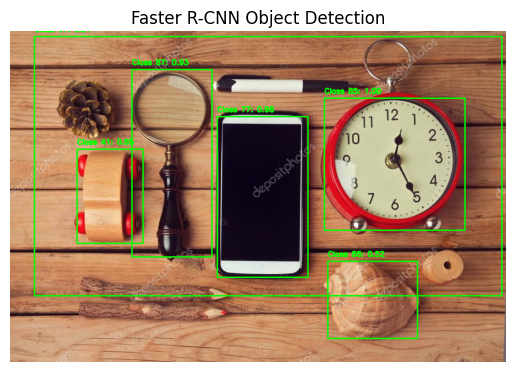

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained Faster R-CNN model from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
model = hub.load(MODEL_URL)

# Load an image
image_path = "/content/obj.jpg"  # Change this to your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image to match model input size (optional)
image_resized = cv2.resize(image_rgb, (640, 640))

# Convert image to tensor
input_tensor = tf.convert_to_tensor(image_resized, dtype=tf.uint8)
input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

# Run the model for object detection
detections = model(input_tensor)

# Extract bounding boxes, scores, and class labels
boxes = detections['detection_boxes'][0].numpy()  # Bounding boxes
scores = detections['detection_scores'][0].numpy()  # Confidence scores
labels = detections['detection_classes'][0].numpy()  # Class IDs

# Draw bounding boxes on the image
h, w, _ = image.shape
for i in range(len(scores)):
    if scores[i] > 0.5:  # Only display objects with confidence > 50%
        y_min, x_min, y_max, x_max = boxes[i]
        x_min, x_max = int(x_min * w), int(x_max * w)
        y_min, y_max = int(y_min * h), int(y_max * h)

        # Draw bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Label the object with confidence score
        label = f"Class {int(labels[i])}: {scores[i]:.2f}"
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Faster R-CNN Object Detection")
plt.show()
